# 교차검증GS을 위해 데이터 준비

In [1]:
import pandas as pd
import seaborn as sns 

#load_dataset 함수 사용 -> DF 변환
df = sns.load_dataset('titanic')

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [4]:
rdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


In [5]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
rdf

714


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


In [6]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

C:\Users\CDL\AppData\Local\Temp\ipykernel_13216\3740832083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['embarked'].fillna(most_freq, inplace=True)


In [7]:
rdf.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,714,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,556,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [10]:
# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y = ndf['survived']                      #종속 변수 Y

In [11]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [12]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


## 교차검증

# 그리스 서치 (데이터 준비 및 나누기)

In [17]:
import pandas as pd

X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y = ndf['survived']     #종속 변수y

data = X
target = y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [19]:
dt = gs.best_estimator_
dt.score(X_train, y_train)

0.9422066549912435

In [25]:
gs.best_params_

{'min_impurity_decrease': 0.0005}

#### 각 매개변수에서 수행한 교차 검증의 평균 점수 확인

In [26]:
gs.cv_results_['mean_test_score']

array([0.80039664, 0.80564455, 0.80213577, 0.8038749 , 0.81266209])

#### 평균 점수에서 가장 큰 값 구하기
- gs.best_params_ 값과 동일함

In [28]:
import numpy as np

best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'min_impurity_decrease': 0.0005}

## 좀 더 복잡한 매개변수 조합 탐색

In [30]:
range(2,100,10)

range(2, 100, 10)

In [50]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [41]:
params

{'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
        0.0009]),
 'max_depth': range(5, 20),
 'min_samples_split': range(2, 100, 10)}

- 교차 검증 횟수
    - 9 x 15 x 10 = 1350개
- 여기에 기본 5폴드
    - 6750개

In [42]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [43]:
gs.best_params_

{'max_depth': 7,
 'min_impurity_decrease': 0.0007000000000000001,
 'min_samples_split': 2}

In [44]:
np.max(gs.cv_results_['mean_test_score'])

0.8231578947368421

# scipy

In [47]:
from scipy.stats import uniform, randint
rgen = randint(0, 10)
rgen.rvs(10) #중복값없이 균일하게

array([9, 7, 6, 5, 3, 8, 6, 0, 6, 5])

In [48]:
# 샘플링 갯수를 늘려서 고르게 가져오는 것 확인 5정도?
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 97, 112,  99,  91,  96, 105,  91,  99, 118,  92], dtype=int64))

In [49]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.98330407, 0.27736477, 0.97585235, 0.97292849, 0.1625903 ,
       0.47735813, 0.74297624, 0.31544138, 0.24482679, 0.07741403])

# min_samples_leaf 매게변수 사용 자식 노드 확인 

In [51]:
from sklearn.model_selection import RandomizedSearchCV

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B018FD4C10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B018F6AC40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B018FD45B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B0190372B0>},
                   random_state=42)

In [52]:
gs.best_params_

{'max_depth': 41,
 'min_impurity_decrease': 0.0004586467812961639,
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [53]:
np.max(gs.cv_results_['mean_test_score'])

0.8283905415713196

#### 훈련세트로 훈련된 객체를 이용하여 테스트 데이터셋점수 확인

##### 해석
- 최적 모델(best_estimator_)는 이미 훈련세트로 훈련되어 best_estimator_에 저장되어 있음

In [54]:
dt = gs.best_estimator_

dt.score(X_test, y_test)

0.7832167832167832

# 결정 트리(DT) model학습

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9562171628721541
0.7622377622377622


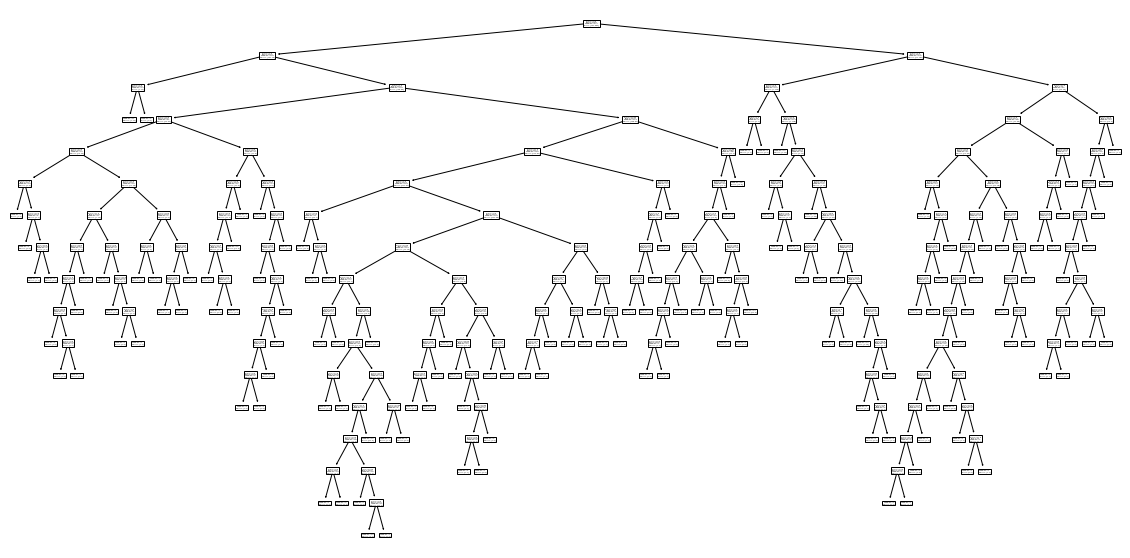

In [61]:
# plot_tree() 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

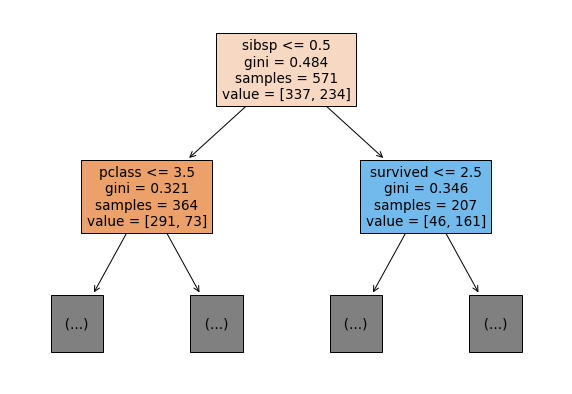

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'])
plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8318739054290718
0.7412587412587412


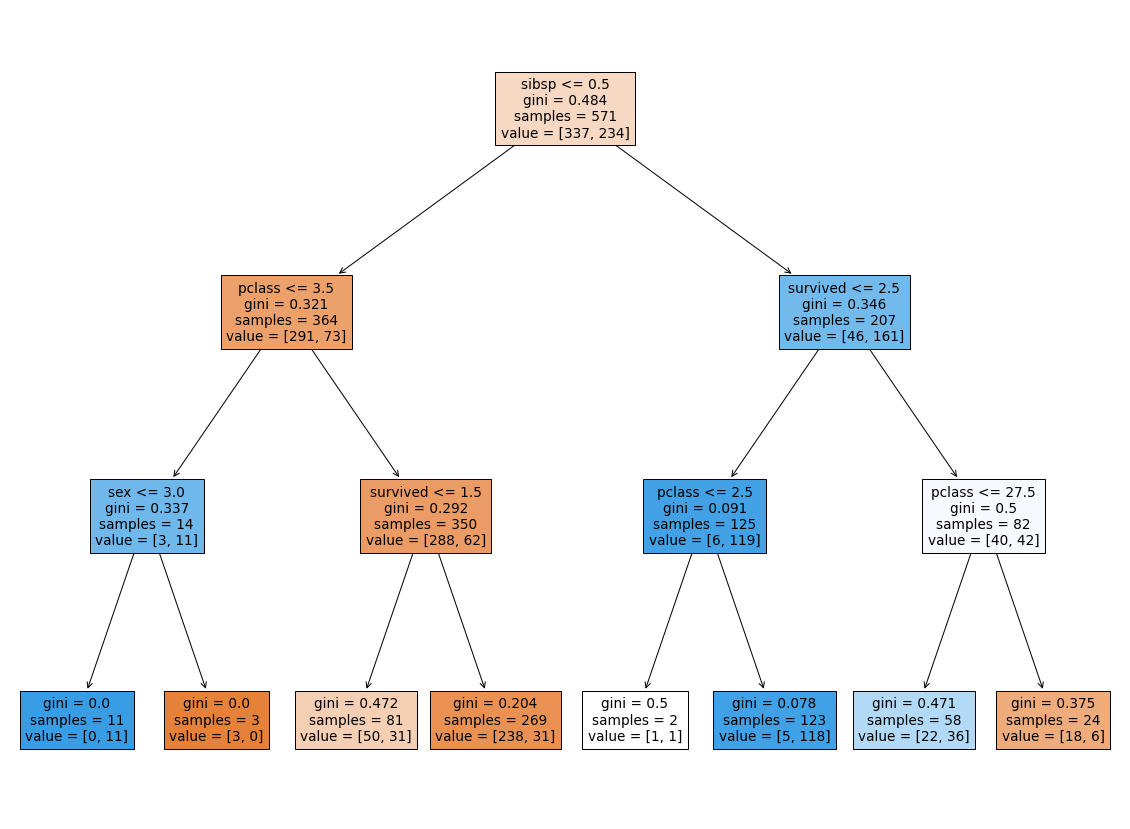

In [64]:
# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'])
plt.show()

### 훈련된 모델을 이용하여 분류 모델 평가지표 확인

In [66]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = dt.predict(X_test)

print('예측:', y_hat[:30])
print('실제:', y_test.values[:30])

예측: [0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0]
실제: [0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]


In [67]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
dt_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(len(X_test))
print(dt_matrix)

143
[[72 15]
 [22 34]]


# 평가지표 : 혼동행렬/F1-score,ROC/AUC

In [68]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

72 15 22 34


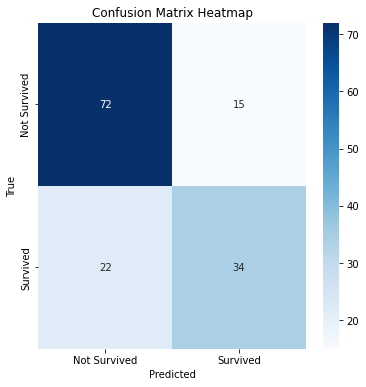

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 테스트 데이터로 모델의 예측값을 얻음
y_pred = dt.predict(X_test)

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 설정 (0: 생존하지 않은 경우, 1: 생존한 경우)
class_labels = ['Not Survived', 'Survived']

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [70]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
accuracy = (TP+TN) / (TN+FP+FN+TP)
print('정확도(accuracy):', accuracy)

정확도(accuracy): 0.7412587412587412


In [71]:
# "양성으로 예측"한 것 중 "실제 양성"인 것
precision = TP / (TP + FP)
print('정밀도(precision):', precision) 

정밀도(precision): 0.6938775510204082


In [72]:
# "실제 음성"인데 "예측을 음성"이라고 한 것
specificity = TN / (TN+FP)
print('특이도(Specificity):', specificity) 

특이도(Specificity): 0.8275862068965517


In [73]:
# "실제 양성"인데 "예측을 양성"이라고 한 것
sensitivity = TP / (TP+FN)
print('민감도(재현율, Recall, Sensitivity):', sensitivity)

민감도(재현율, Recall, Sensitivity): 0.6071428571428571


In [74]:
# "음성으로 예측"한 것들 중 "실제 음성"인 것
NPV = TN / (TN+FN)
print('음성 예측 가치(NPV):', NPV)

음성 예측 가치(NPV): 0.7659574468085106


In [75]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
f1_score = 2 * ((precision*sensitivity) / (precision+sensitivity))
print('f1-score(조화평균):', f1_score)

f1-score(조화평균): 0.6476190476190475


In [76]:
# 모형 성능 평가 - 평가지표 계산
dt_report = metrics.classification_report(y_test, y_hat)            
print(dt_report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        87
           1       0.69      0.61      0.65        56

    accuracy                           0.74       143
   macro avg       0.73      0.72      0.72       143
weighted avg       0.74      0.74      0.74       143



In [77]:
dt.score(X_test, y_test)

0.7412587412587412

# ROC/AUC

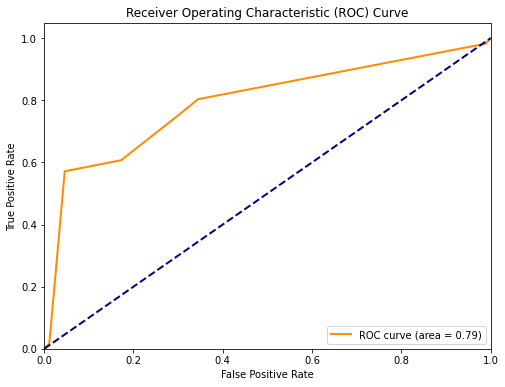

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
y_prob = dt.predict_proba(X_test)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()